**Global and Local Alignment**

Sequence alignment is a method of arranging sequences of DNA, RNA, or Amino Acids or proteins to identify regions of similarity. \
\
Similarity: Degree of likeness between two sequences, usually expressed as a percentage of similar (or identical) residues over a given length of the alignment. Can usually be easily calculated. \
\
Homology: Statement about common evolutionary ancestry of two sequences. Can only be true or false. We can rarely be certain about this, it is therefore usually a hypothesis that may be more or less probable. \
\
A high degree if similarity implies a high probability of homology

In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.6 MB/s eta 0:00:00


In [2]:
import Bio
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Seq import Seq

/usr/local/lib/python3.8/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
seq1 = Seq('ACTCGT')
seq2 = Seq('ATTCG')

In [4]:
# Global Alignment
alignments = pairwise2.align.globalxx(seq1, seq2)

In [5]:
alignments

[Alignment(seqA='ACT-CGT', seqB='A-TTCG-', score=4.0, start=0, end=7),
 Alignment(seqA='AC-TCGT', seqB='A-TTCG-', score=4.0, start=0, end=7),
 Alignment(seqA='ACTCGT', seqB='ATTCG-', score=4.0, start=0, end=6)]

In [6]:
# To display the alignment
print(format_alignment(*alignments[0]))

ACT-CGT
| | || 
A-TTCG-
  Score=4



In [7]:
# View all
for a in alignments:
  print(format_alignment(*a))

ACT-CGT
| | || 
A-TTCG-
  Score=4

AC-TCGT
|  ||| 
A-TTCG-
  Score=4

ACTCGT
|.||| 
ATTCG-
  Score=4



When to use local alignment 
1. 2 sequences have a small matched region 
2. 2 Sequences are of different lengths
3. Overlapping sequences 
4. One sequences is a subsequences of the other

In [8]:
# Local alignment
loc_alignments = pairwise2.align.localxx(seq1, seq2)

In [9]:
# View all
for a in loc_alignments:
  print(format_alignment(*a))

1 ACT-CG
  | | ||
1 A-TTCG
  Score=4

1 AC-TCG
  |  |||
1 A-TTCG
  Score=4

1 ACTCG
  |.|||
1 ATTCG
  Score=4



In [10]:
# Get the alignment by only the score
alignment2 = pairwise2.align.globalxx(seq1, seq2, one_alignment_only = True, score_only = True)

In [11]:
alignment2

4.0

**Similarity Analysis**

Check for similarity or percentage of similarity using Alignment \
\
(fraction of nucleotides that is the same) / (total number of nucleotides) * 100%

In [12]:
seq1

Seq('ACTCGT')

In [13]:
seq2

Seq('ATTCG')

In [14]:
alignment2 / len(seq1) * 100

66.66666666666666

In [15]:
# Get the alignment by only the score
loc_alignment2 = pairwise2.align.localxx(seq1, seq2, one_alignment_only = True, score_only = True)

In [16]:
loc_alignment2 / len(seq1) * 100

66.66666666666666

Check for similarity or percentage of similarity using Alignment 

The minimal number of edit operations (inserts, deletes, and substitutions) in order to transform the one sequence into an exact copy of the other sequence being aligned 

Distance Identity: the number of characters that match EXACTLY between two different sequences 

Gaps are not counted The measurement is relational to the shorter of the two sequences. This has the effect that sequence identity is not transitive, i.e. if sequence A=B and B=C then A is not necessarily equal C (in terms of the identity distance measure) :

- Here:
  - Identity(A,B) = 100% (5 identical nucleotides / min(length(A), length(B))).
  - Identity(B,C) = 100%
  - Identity(A,C) = 85% (6 identical nucleotides / 7). 

  So, 100% identity does not mean two sequences are the same.

- Sequence similarity is first of all a general description of a relationship but nevertheless its more or less common practice to define similarity as an optimal matching problem (for sequence alignments or unless defined otherwise)

- Hereby, the optimal matching algorithm finds the minimal number of edit operations (inserts, deletes, and substitutions) in order to transform the one sequence into an exact copy of the other sequence being aligned (edit distance)

- Using this, the percentage sequence similarity of the examples above are:
  - sim(A,B) = 60%
  - sim(B,C) = 60%
  - sim(A,C) = 86%

  (semi-global, sim = 1 - (edit distance / unaligned length of the shorter sequence)

  But there are other ways to define similarity between two objects (e.g. using tertiary structure of proteins). And then you might start to conclude from similarity to homology, but this was already covered sufficiently.


In [17]:
seqA = Seq('AAGGCTT')
seqB = Seq('AAGGC')
seqC = Seq('AAGGCAT')

In [18]:
AvB = pairwise2.align.localxx(seqA, seqB, one_alignment_only = True, score_only = True)
BvC = pairwise2.align.localxx(seqB, seqC, one_alignment_only = True, score_only = True)
AvC = pairwise2.align.localxx(seqA, seqC, one_alignment_only = True, score_only = True)

In [19]:
print("AvB", AvB / len(seqB) * 100)
print("BvC", BvC / len(seqB) * 100)
print("AvC", AvC / len(seqC) * 100)

AvB 100.0
BvC 100.0
AvC 85.71428571428571


In [20]:
# Check if same
seqA == seqB

False

**Hamming Distance, Levenstein Distance, and Dot Plot**

Hamming distance: shows how many places 2 strings differ 

1. Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. 
2. In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other.
3. It is used for error detection or error correction 
4. It is used to quantify the similarity of DNA sequences,

In [21]:
seq1 = Seq('ACTAT')
seq2 = Seq('ACTTA')
seq3 = Seq('ACTT')

In [22]:
# Hamming Distance Function
def hamming_distance(lhs, rhs):
  return len([(x,y) for x,y in zip(lhs, rhs) if x != y])

In [23]:
hamming_distance(seq1, seq2)

2

In [24]:
# 0 if the same
hamming_distance(seq1, seq1)

0

In [25]:
print(seq1)
print(seq1[::-1])

ACTAT
TATCA


In [26]:
hamming_distance(seq1, seq1[::-1])

4

In [27]:
hamming_distance(seq1, seq3)

1

Levenshtein distance: This method was invented in 1965 by the Russian Mathematician Vladimir Levenshtein (1935-2017). 
1. The distance value describes the minimal number of deletions, insertions, or substitutions that are required to transform one string (the source) into another (the target) 
2. Unlike the Hamming distance, the Levenshtein distance works on strings with an unequal length

In [28]:
!pip install python-Levenshtein
from Levenshtein import distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.4 MB/s eta 0:00:00


In [29]:
distance(str(seq1), str(seq2))

2

In [30]:
print("Hamming distance", hamming_distance(seq1, seq2))
print("Levenshtein distance", distance(str(seq1), str(seq2)))

Hamming distance 2
Levenshtein distance 2


In [31]:
print("Hamming distance", hamming_distance(seq1, seq3))
print("Levenshtein distance", distance(str(seq1), str(seq3)))

Hamming distance 1
Levenshtein distance 1


Dot Plot 
1. A dot plot is a graphical method that allows the comparison of two biological sequences and identify regions of close similarity between them. 
2. Simplest method - put a dot wherever sequences are identical 
3. Dot plots compare two sequences by organizing one sequence on the x-axis, and another on the y-axis, of a plot. 
4. When the residues of both sequences match at the same location on the plot, a dot is drawn at the corresponding position usefulness 

Dot plots can also be used to visually inspect sequences for : direct or inverted repeats; regions with low sequence complexity; Similar regions; Repeated sequences; Sequence rearrangements; RNA structures; Gene order

In [32]:
# Define function

def delta(x,y):
  return 0 if x == y else 1

def M(seq1, seq2, i, j, k):
  return sum(delta(x,y) for x,y in zip(seq1[i:i+k], seq2[j:j+k]))

def makeMatrix(seq1, seq2, k):
  n = len(seq1)
  m = len(seq2)
  return [[M(seq1, seq2, i, j, k) for j in range(m - k + 1)] for i in range(n - k + 1)]

def plotMatrix(M, t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
  print(' |' + seq2)
  print('-' * (2 + len(seq2)))
  for label,row in zip(seq1, M):
    line = ''.join(nonblank if s < t else blank for s in row)
    print(label + '|' + line)

def dotplot(seq1, seq2, k = 1, t = 1):
  M = makeMatrix(seq1, seq2, k)
  plotMatrix(M, t, seq1, seq2) # experiment with character choice

 |AC
----
A|■ 
C| ■
T|  
T|  
A|■ 
G|  

 |ACTTAG
--------
A|■   ■ 
C| ■    
T|  ■■  
T|  ■■  
A|■   ■ 
G|     ■

 |TREE
------
T|■   
R| ■  
E|  ■■
E|  ■■



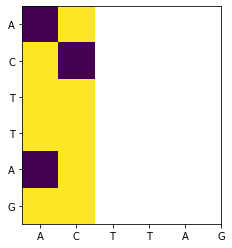

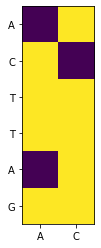


 |ATTATGTCGTAA
--------------
A|■  ■      ■■
T| ■■ ■ ■  ■  
G|     ■  ■   
A|■  ■      ■■
T| ■■ ■ ■  ■  
C|       ■    
T| ■■ ■ ■  ■  
C|       ■    
G|     ■  ■   
T| ■■ ■ ■  ■  
A|■  ■      ■■
A|■  ■      ■■



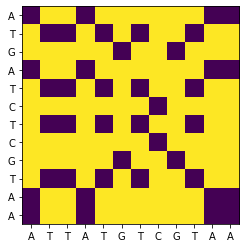

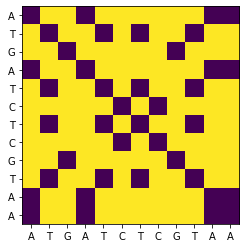

In [33]:
# Run dotplot function

from Bio.Seq import Seq

seq1 = Seq('ACTTAG')
seq2 = Seq('AC')

dotplot(seq1, seq2)
print()

# identical show diagonal
dotplot(seq1, seq1)
print()

# identical show diagonal
dotplot('TREE', 'TREE')
print()

import matplotlib.pyplot as plt
import numpy as np

# Add some fancyness to it
plt.imshow(np.array(makeMatrix(seq1, seq2, 1)))
xt = plt.xticks(np.arange(len(list(seq1))), list(seq1))
yt = plt.yticks(np.arange(len(list(seq1))), list(seq1))
plt.show()
print()

# Convert to function
def dotplotx(seq1, seq2):
  plt.imshow(np.array(makeMatrix(seq1, seq2, 1)))
  # on x-axis list all sequences of seq 2
  xt = plt.xticks(np.arange(len(list(seq2))), list(seq2))
  # on y-axis list all sequences of seq 1
  yt = plt.yticks(np.arange(len(list(seq1))), list(seq1))
  plt.show()

dotplotx(seq1, seq2)
print()

dna1 = Seq('ATGATCTCGTAA')
dna2 = Seq('ATTATGTCGTAA')

dotplot(dna1, dna2)
print()

dotplotx(dna1, dna2)
print()

dotplotx(dna1, dna1)
print()

EXERCISE

In [34]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import Bio
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [36]:
sequence1 = Seq('ATGCATGGTGCGCGA')
sequence2 = Seq('ATTTGTGCTCCTGGA')

print(len(sequence1))
print(len(sequence2))

15
15


In [37]:
seqAlign = pairwise2.align.globalxx(sequence1, sequence2)

In [38]:
for a in seqAlign:
  print(format_alignment(*a))

ATGCATG-GTGCG-C--G-A
||   |  ||||  |  | |
AT---T-TGTGC-TCCTGGA
  Score=10

ATGCATGGTGCG-C--G-A
||   |.||||  |  | |
AT---TTGTGC-TCCTGGA
  Score=10

ATGCA-TGGTGCG-C--G-A
||    | ||||  |  | |
AT---TT-GTGC-TCCTGGA
  Score=10

ATGCATGGTGCG-C--G-A
||  .| ||||  |  | |
AT--TT-GTGC-TCCTGGA
  Score=10

ATGCATGGTGCG-C--G-A
|| . | ||||  |  | |
AT-T-T-GTGC-TCCTGGA
  Score=10

ATGCATGGTGCG-C--G-A
||.  | ||||  |  | |
ATT--T-GTGC-TCCTGGA
  Score=10

A-TGCATGGTGCG-C--G-A
| |   | ||||  |  | |
ATT---T-GTGC-TCCTGGA
  Score=10

ATGCAT-GGTGCG-C--G-A
||   | | |||  |  | |
AT---TTG-TGC-TCCTGGA
  Score=10

ATGCA-TGGTGCG-C--G-A
||    || |||  |  | |
AT---TTG-TGC-TCCTGGA
  Score=10

ATGCATGGTGCG-C--G-A
||  .|| |||  |  | |
AT--TTG-TGC-TCCTGGA
  Score=10

ATGCATGGTGCG-C--G-A
|| . || |||  |  | |
AT-T-TG-TGC-TCCTGGA
  Score=10

ATGCATGGTGCG-C--G-A
||.  || |||  |  | |
ATT--TG-TGC-TCCTGGA
  Score=10

A-TGCATGGTGCG-C--G-A
| |   || |||  |  | |
ATT---TG-TGC-TCCTGGA
  Score=10

ATGCATG-GTGCGC--G-A
||   |  ||||.|  | |
AT---T

In [39]:
# Choose global alignment because the two sequences has the same length
seqAlign = pairwise2.align.globalxx(sequence1, sequence2, one_alignment_only = True, score_only = True)

In [40]:
seqAlign

10.0

In [41]:
print(seqAlign / len(sequence1) * 100)

66.66666666666666


In [42]:
def hamming_distance(lhs, rhs):
  return len([(x,y) for x,y in zip(lhs, rhs) if x != y])

print(hamming_distance(sequence1, sequence2))

7


In [43]:
!pip install python-Levenshtein
from Levenshtein import distance

distance(str(sequence1), str(sequence2))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


7

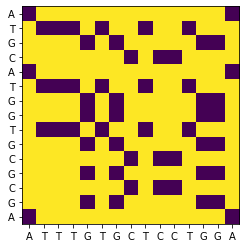

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def dotplotx(seq1, seq2):
  plt.imshow(np.array(makeMatrix(seq1, seq2, 1)))
  # on x-axis list all sequences of seq 2
  xt = plt.xticks(np.arange(len(list(seq2))), list(seq2))
  # on y-axis list all sequences of seq 1
  yt = plt.yticks(np.arange(len(list(seq1))), list(seq1))
  plt.show()

dotplotx(sequence1, sequence2)

BLUEJACK CASE

In [45]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import Bio
from Bio.Seq import Seq

In [47]:
seqA = Seq('AAGCTTAGCTAGAGCAGTCAGCTAGCTAGCT')
seqB = Seq('TCTGAAGCTAGCTAGTGCATAGCTAGCTAGC')

print(len(seqA) == len(seqB))
print(len(seqA))

True
31


In [48]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [49]:
seqLocAlign = pairwise2.align.localxx(seqA, seqB)

for a in seqLocAlign:
  print(format_alignment(*a))

1 AAGCTTAGCTAGA-GCAGTCAGCTAGCTAGC
  |||| |||||||  ||| | |||||||||||
5 AAGC-TAGCTAG-TGCA-T-AGCTAGCTAGC
  Score=26

1 AAGCTTAGCTAGA-GCAGTCAGCTAGCTAGC
  ||||| ||||||  ||| | |||||||||||
5 AAGCT-AGCTAG-TGCA-T-AGCTAGCTAGC
  Score=26

1 AAGCTTAGCTAGAGCAGTCAGCTAGCTAGC
  |||| |||||||.||| | |||||||||||
5 AAGC-TAGCTAGTGCA-T-AGCTAGCTAGC
  Score=26

1 AAGCTTAGCTAGAGCAGTCAGCTAGCTAGC
  ||||| ||||||.||| | |||||||||||
5 AAGCT-AGCTAGTGCA-T-AGCTAGCTAGC
  Score=26



In [50]:
seqLocAlign = pairwise2.align.localxx(seqA, seqB, one_alignment_only = True, score_only = True)

In [51]:
seqLocAlign

26.0

In [52]:
def hamming_distance(lhs, rhs):
  return len([(x,y) for x,y in zip(lhs, rhs) if x != y])

print(hamming_distance(seqA, seqB))

30


In [53]:
!pip install python-Levenshtein
from Levenshtein import distance

distance(str(seqA), str(seqB))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


9

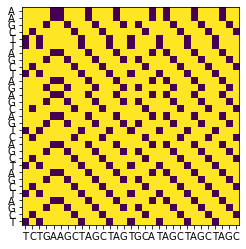

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def dotplotx(seq1, seq2):
  plt.imshow(np.array(makeMatrix(seq1, seq2, 1)))
  # on x-axis list all sequences of seq 2
  xt = plt.xticks(np.arange(len(list(seq2))), list(seq2))
  # on y-axis list all sequences of seq 1
  yt = plt.yticks(np.arange(len(list(seq1))), list(seq1))
  plt.show()

dotplotx(seqA, seqB)